In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
folder = "/Volumes/guttman/Guoming_Gao-Resnick/Data_LicorScanner/20250516-biotin dot blot"
fname = "Quantification-all_high_to_low-pos_exon_intron.csv"
os.chdir(folder)
df = pd.read_csv(fname)

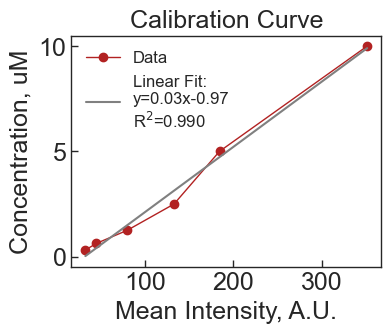

In [3]:
data = df[df["Group"] == "biotin-DNA"]

# Extract x and y values for regression
y = data["Concentration_uM_ngul"]
x = data["Mean"]

# Calculate linear regression parameters
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the regression line values
regression_line = slope * x + intercept

plt.figure(figsize=(4, 3))

# Plot the data points
plt.plot(x, y, lw=1, marker="o", label="Data", c='firebrick')

# Plot the regression line
plt.plot(
    x,
    regression_line,
    color="gray",
    label=f"Linear Fit:\ny={slope:.2f}x{intercept:.2f}\nR$^2$={r_value**2:.3f}",
)

plt.ylabel("Concentration, uM", fontsize=18)
plt.xlabel("Mean Intensity, A.U.", fontsize=18)
plt.title("Calibration Curve", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)

# Add a legend to display the regression formula
plt.legend(fontsize=12, frameon=False)

plt.savefig(
    "BiotinDotBlot_calibration_curve.png", format="png", bbox_inches="tight", dpi=300
)

In [4]:
exon_biotin_uM = np.array(df[df["Group"] == "biotin-exon"]["Mean"] * slope + intercept)
exon_ng_ul = df[df["Group"] == "biotin-exon"]["Concentration_uM_ngul"].to_numpy()
intron_biotin_uM = np.array(df[df["Group"] == "biotin-intron"]["Mean"] * slope + intercept)
intron_ng_ul = df[df["Group"] == "biotin-intron"]["Concentration_uM_ngul"].to_numpy()

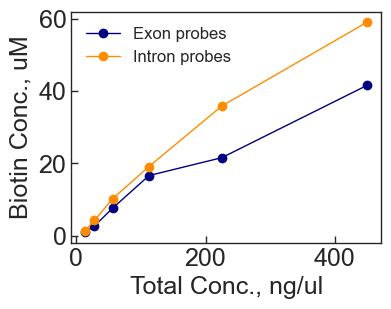

In [5]:
plt.figure(figsize=(4, 3))

plt.plot(
    exon_ng_ul,
    exon_biotin_uM,
    lw=1,
    marker="o",
    c="navy",
    label='Exon probes',
)
plt.plot(
    intron_ng_ul,
    intron_biotin_uM,
    lw=1,
    marker="o",
    c="darkorange",
    label='Intron probes',
)

plt.xlabel("Total Conc., ng/ul", fontsize=18)
plt.ylabel("Biotin Conc., uM", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)

# Add a legend to display the regression formula
plt.legend(fontsize=12, frameon=False)

plt.savefig(
    "BiotinDotBlot_measurements.png", format="png", bbox_inches="tight", dpi=300
)

In [6]:
mw_biotin_11_CTP = 893.48
mw_CTP = 483.16
mw_biotin_11 = mw_biotin_11_CTP - mw_CTP  # g/mol,

# M.W. of ssRNA = (# nucleotides x 320.5) + 159.0
mw_RNA = 130 * 320.5 + 159

exon_biotin_ng_ul = (
    exon_biotin_uM * mw_biotin_11 * 10 ** (-3)
)  # ug/L * 10^-6 = ug/ul * 10^3 = ng/ul
exon_RNA_ng_ul = exon_ng_ul - exon_biotin_ng_ul
exon_RNA_uM = exon_RNA_ng_ul / mw_RNA * 10**3  # ng/ul=mg/l / g/mol = mM * 10^3 = uM
exon_biotin_per_RNA = exon_biotin_uM / exon_RNA_uM

intron_biotin_ng_ul = (
    intron_biotin_uM * mw_biotin_11 * 10 ** (-3)
)  # ug/L * 10^-6 = ug/ul * 10^3 = ng/ul
intron_RNA_ng_ul = intron_ng_ul - intron_biotin_ng_ul
intron_RNA_uM = intron_RNA_ng_ul / mw_RNA * 10**3  # ng/ul=mg/l / g/mol = mM * 10^3 = uM
intron_biotin_per_RNA = intron_biotin_uM / intron_RNA_uM

print(
    "Exon probe's biotin per RNA:",
    f"{np.mean(exon_biotin_per_RNA):.1f} \u00B1 {np.std(exon_biotin_per_RNA):.1f}",
    "RNA conc. (uM) for 450 ng/ul:",
    f"{exon_RNA_uM[0]:.1f}",
)
print(
    "Intron probe's biotin per RNA:",
    f"{np.mean(intron_biotin_per_RNA):.1f} \u00B1 {np.std(intron_biotin_per_RNA):.1f}"
    "RNA conc. (uM) for 450 ng/ul:",
    f"{intron_RNA_uM[0]:.1f}",
)

Exon probe's biotin per RNA: 4.7 ± 1.2 RNA conc. (uM) for 450 ng/ul: 10.4
Intron probe's biotin per RNA: 6.7 ± 1.3RNA conc. (uM) for 450 ng/ul: 10.2
